## Analysis of Electron Microscopy 2D Images

## Purpose
This Jupyter notebook is designed to introduce basic techniques for processing electron microscopy images with Python. 
Users will learn how to load, crop, filter, and prepare images for publication.

### Tools and Libraries
We will be using Python libraries such as `matplotlib`, `numpy`, and `scikit-image` for image manipulation and visualization. These tools are essential for scientific image processing and will help us achieve professional results suitable for academic publication.

### What You Will Learn
- **Loading Images**: How to import electron microscopy images into Python.
- **Cropping Images**: How to focus on the area of interest by cropping the image.
- **Filtering Images**: Applying various filters to enhance the image quality.
- **Preparing Images for Publication**: Adjusting image properties like contrast and brightness to ensure they are suitable for publication.

By the end of this notebook, you will be familiar with the basic steps needed to process microscopy images and prepare them for a professional setting.

*notebook created by Roberto dos Reis -- roberto.reis@northwestern.edu -- @2024*


## 1. Loading and Displaying Images

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

Text(0.5, 1.0, 'SEM Image of a Material X')

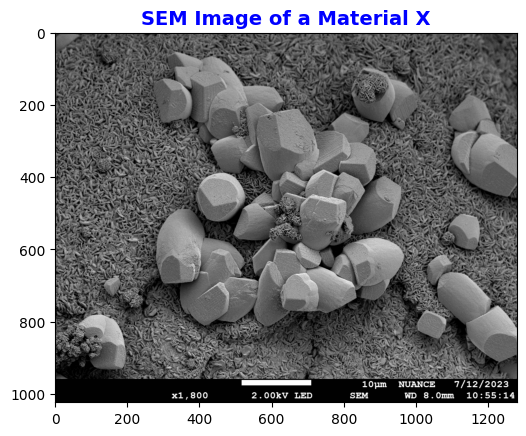

In [19]:
# Load an image file
image_path = 'images/12Jul2023 Mystery-01.tif'  # Change this to the path of your microscopy image
# image_path = 'images/13Jun2023 Monosphere-01.tif'  # Change this to the path of your microscopy image
# image_path = 'images/13Mar2023 Corn Starch-06.tif'  # Change this to the path of your microscopy image
# image_path = 'images/LLTO_800.tif' # Change this to the path of your microscopy image


image = io.imread(image_path)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('SEM Image of a Material X', fontsize=14, 
          fontweight='bold', 
          color='blue', 
          loc='center')
# plt.axis('off')  # Hide axes ticks

## 2. Image Cropping 

This can be particularly useful in electron microscopy for focusing on specific structures or areas that are most relevant for analysis.

By cropping an image, you can:
- Reduce the size of the image, making it easier to handle and process.
- Focus on the region of interest, removing irrelevant parts.
- Enhance the visibility of specific features by isolating them from the background.

In the code below, we will demonstrate how to crop an electron microscopy image using NumPy slicing. The cropping coordinates (start and end points for rows and columns) can be adjusted to select the desired region.


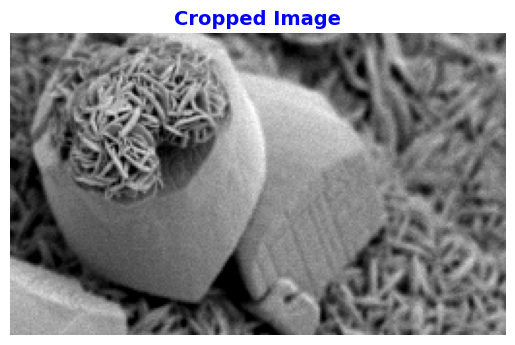

In [27]:
# Define cropping coordinates: (start_row, end_row, start_col, end_col)
start_row, end_row = 110, 266
start_col, end_col = 810, 1066

# Crop the image
cropped_image = image[start_row:end_row, start_col:end_col]

# Display the cropped image
plt.imshow(cropped_image, cmap='gray')
plt.title('Cropped Image',fontsize=14, fontweight='bold', color='blue', loc='center')
plt.axis('off')
plt.show()

### 3. Image Filtering

Image filtering is a crucial step in image processing that involves modifying or enhancing an image to achieve specific objectives, such as noise reduction, edge detection, or improving visual clarity. In electron microscopy, filtering can help to highlight important features, reduce background noise, and prepare images for further analysis.

Common filtering techniques include:
- **Gaussian Filter**: This filter smooths the image by averaging pixel values with their neighbors, reducing noise and detail.
- **Median Filter**: This filter replaces each pixel's value with the median value of its neighboring pixels, effectively removing noise while preserving edges.

In the code below, we will apply both Gaussian and Median filters to an electron microscopy image using the `skimage.filters` module. These filters can be adjusted by changing their parameters to achieve the desired effect.

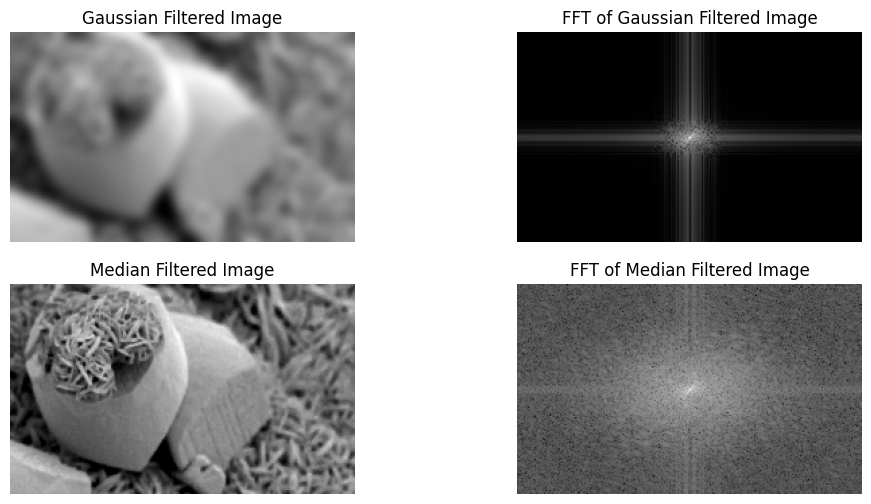

In [32]:
from skimage.filters import gaussian, median
from skimage.morphology import disk
from numpy.fft import fft2, fftshift, ifft2
import numpy as np

def plot_fft(image, ax, title):
    fft_image = fftshift(fft2(image))
    magnitude_spectrum = np.log(np.abs(fft_image) + 1)
    ax.imshow(magnitude_spectrum, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Apply Gaussian filter
gaussian_filtered = gaussian(cropped_image, sigma=4)

# Apply Median filter (using a disk-shaped kernel)
median_filtered = median(cropped_image, footprint=disk(1))

# Display the filtered images along with their FFTs
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

# Gaussian Filtered Image and its FFT
ax[0, 0].imshow(gaussian_filtered, cmap='gray')
ax[0, 0].set_title('Gaussian Filtered Image')
ax[0, 0].axis('off')

plot_fft(gaussian_filtered, ax[0, 1], 'FFT of Gaussian Filtered Image')

# Median Filtered Image and its FFT
ax[1, 0].imshow(median_filtered, cmap='gray')
ax[1, 0].set_title('Median Filtered Image')
ax[1, 0].axis('off')

plot_fft(median_filtered, ax[1, 1], 'FFT of Median Filtered Image')

plt.show()

### Preparing for Publication

Preparing images for publication involves enhancing their quality to ensure they are clear, informative, and visually appealing. This process typically includes adjusting contrast, brightness, and applying other techniques to highlight key features.

In electron microscopy, enhancing images for publication may involve:
- **Contrast Stretching**: Expanding the range of intensity values to improve visibility of features.
- **Histogram Equalization**: Distributing intensity values to enhance contrast.

In the code below, we will demonstrate these techniques and compare their effects in both the spatial and reciprocal spaces using Fast Fourier Transform (FFT).


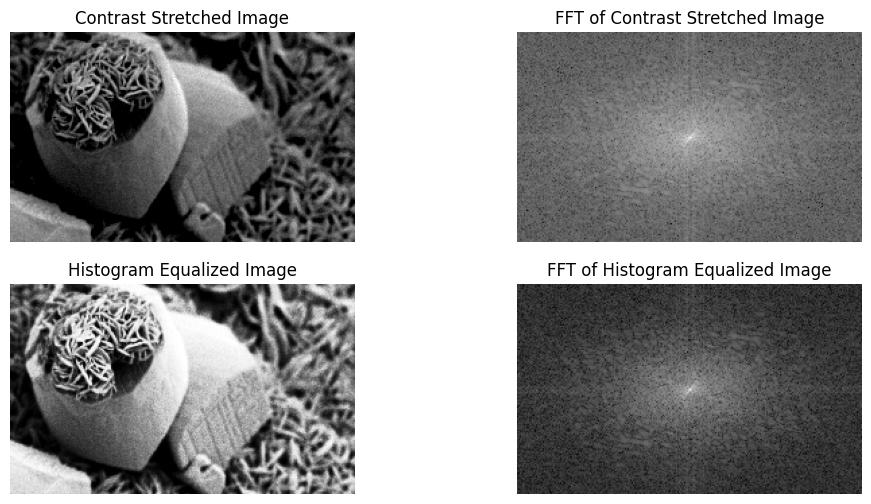

In [35]:
from skimage import exposure

def plot_fft(image, ax, title):
    fft_image = fftshift(fft2(image))
    magnitude_spectrum = np.log(np.abs(fft_image) + 1)
    ax.imshow(magnitude_spectrum, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Adjust contrast using rescaling
contrast_stretched = exposure.rescale_intensity(cropped_image, in_range=(50, 200))

# Histogram equalization
equalized_image = exposure.equalize_hist(cropped_image)

# Display the enhanced images along with their FFTs
fig, ax = plt.subplots(2, 2, figsize=(12, 6))

# Contrast Stretched Image and its FFT
ax[0, 0].imshow(contrast_stretched, cmap='gray')
ax[0, 0].set_title('Contrast Stretched Image')
ax[0, 0].axis('off')

plot_fft(contrast_stretched, ax[0, 1], 'FFT of Contrast Stretched Image')

# Histogram Equalized Image and its FFT
ax[1, 0].imshow(equalized_image, cmap='gray')
ax[1, 0].set_title('Histogram Equalized Image')
ax[1, 0].axis('off')

plot_fft(equalized_image, ax[1, 1], 'FFT of Histogram Equalized Image')

plt.show()

# Save images
io.imsave('contrast_stretched_image.tif', contrast_stretched)
io.imsave('equalized_image.tif', equalized_image)


### Visualizing the Effect of Image Enhancements with Histograms

To better understand the impact of image enhancement techniques, we can visualize the pixel intensity distributions using histograms. A histogram represents the frequency of pixel intensity values in an image. 

In this section, we will compare the histograms of the original image, the contrast-stretched image, and the histogram-equalized image.

#### Original Image Histogram
- The histogram of the original image shows the distribution of pixel intensities as they were captured.
- Often, the intensity values may be clustered in a specific range, which can result in poor contrast and visibility of features.

#### Contrast-Stretched Image Histogram
- Contrast stretching expands the range of intensity values, effectively increasing the dynamic range of the image.
- This results in a more even distribution of pixel values across the available range, enhancing the visibility of features.
- In the histogram, you will see the intensity values spread out more evenly compared to the original image.

#### Histogram-Equalized Image Histogram
- Histogram equalization redistributes the intensity values to achieve a uniform histogram.
- This technique improves contrast by ensuring that all intensity values are equally represented.
- In the histogram, you will observe a more uniform distribution of pixel values, which helps in bringing out details in regions that were otherwise poorly contrasted.

The histograms below illustrate these changes:

1. **Original Image Histogram**: Shows the initial distribution of pixel intensities.
2. **Contrast-Stretched Image Histogram**: Demonstrates the effect of expanding the intensity range, resulting in better contrast.
3. **Histogram-Equalized Image Histogram**: Displays a more uniform distribution, highlighting details across the image.


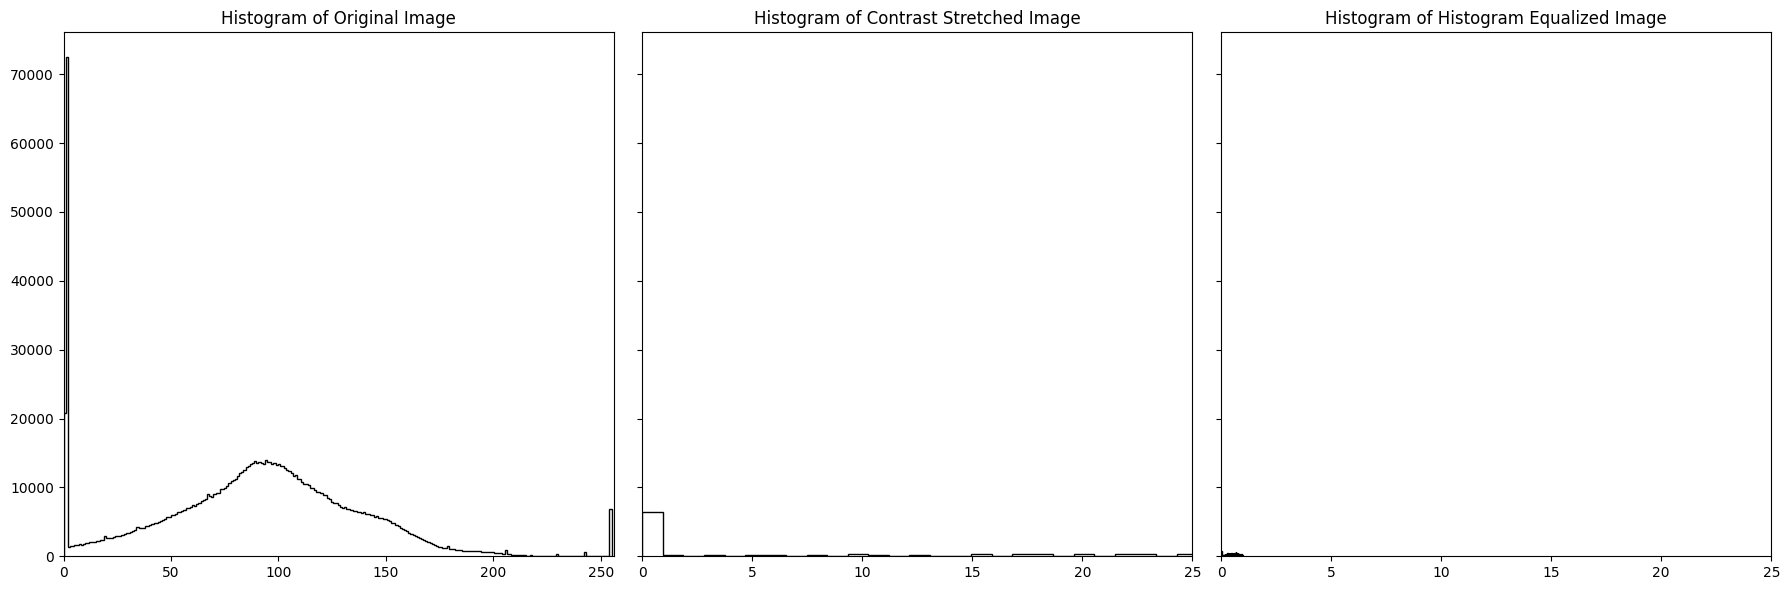

In [41]:
# Display histograms of the original, contrast stretched, and histogram equalized images
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Original Image Histogram
ax[0].hist(image.ravel(), bins=256, histtype='step', color='black')
ax[0].set_title('Histogram of Original Image')
ax[0].set_xlim(0, 256)

# Contrast Stretched Image Histogram
ax[1].hist(contrast_stretched.ravel(), bins=256, histtype='step', color='black')
ax[1].set_title('Histogram of Contrast Stretched Image')
ax[1].set_xlim(0, 25)

# Histogram Equalized Image Histogram
ax[2].hist(equalized_image.ravel(), bins=256, histtype='step', color='black')
ax[2].set_title('Histogram of Histogram Equalized Image')
ax[2].set_xlim(0, 25)

plt.tight_layout()
plt.show()


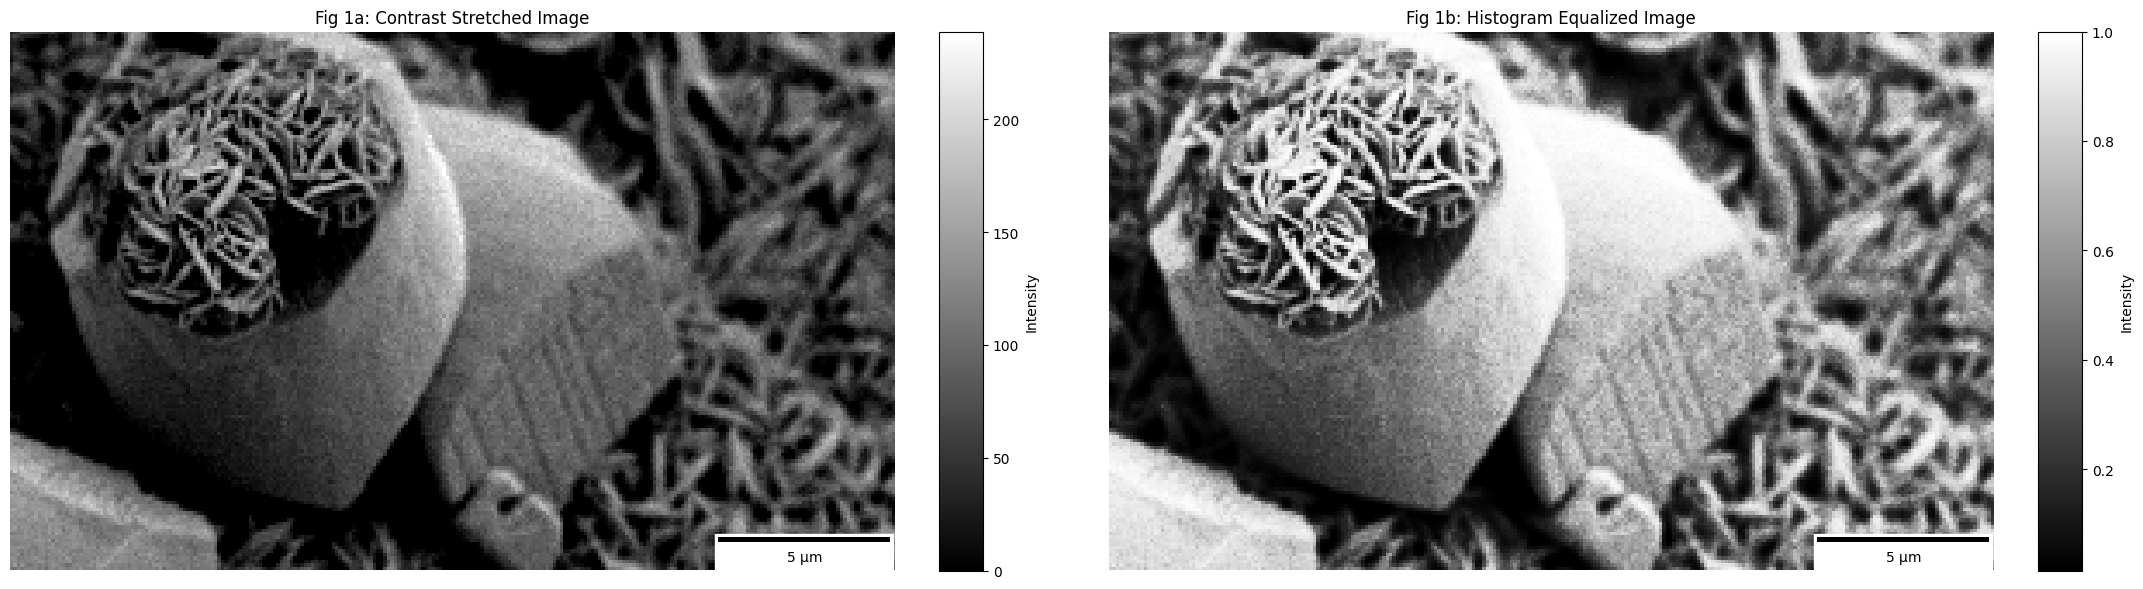

In [56]:
from skimage import exposure
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes



# Prepare the images for publication with labels, scale bar, and colorbar
fig, ax = plt.subplots(1, 2, figsize=(26, 7))

# Contrast Stretched Image (Fig 1a)
im1 = ax[0].imshow(contrast_stretched, cmap='gray')
ax[0].set_title('Fig 1a: Contrast Stretched Image')
ax[0].axis('off')

# Add scale bar
scalebar1 = ScaleBar(0.1, 'um', location='lower right', frameon=True, color='black')  # Adjust scale as per your image's scale
ax[0].add_artist(scalebar1)

# Add colorbar
cax1 = inset_axes(ax[0], width="5%", height="100%", loc='lower left',
                  bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=ax[0].transAxes, borderpad=0)
cbar1 = fig.colorbar(im1, cax=cax1)
cbar1.set_label('Intensity')

# Histogram Equalized Image (Fig 1b)
im2 = ax[1].imshow(equalized_image, cmap='gray')
ax[1].set_title('Fig 1b: Histogram Equalized Image')
ax[1].axis('off')

# Add scale bar
scalebar2 = ScaleBar(0.1, 'um', location='lower right', frameon=True, color='k')  # Adjust scale as per your image's scale
ax[1].add_artist(scalebar2)

# Add colorbar
cax2 = inset_axes(ax[1], width="5%", height="100%", loc='lower left',
                  bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=ax[1].transAxes, borderpad=0)
cbar2 = fig.colorbar(im2, cax=cax2)
cbar2.set_label('Intensity')

plt.show()


**Figure 1**: (a) Contrast stretched image showing improved visibility of features by expanding the range of intensity values. (b) Histogram equalized image highlighting details by redistributing the intensity values for enhanced contrast. Both images include a scale bar (0.1 μm) and an intensity colorbar.


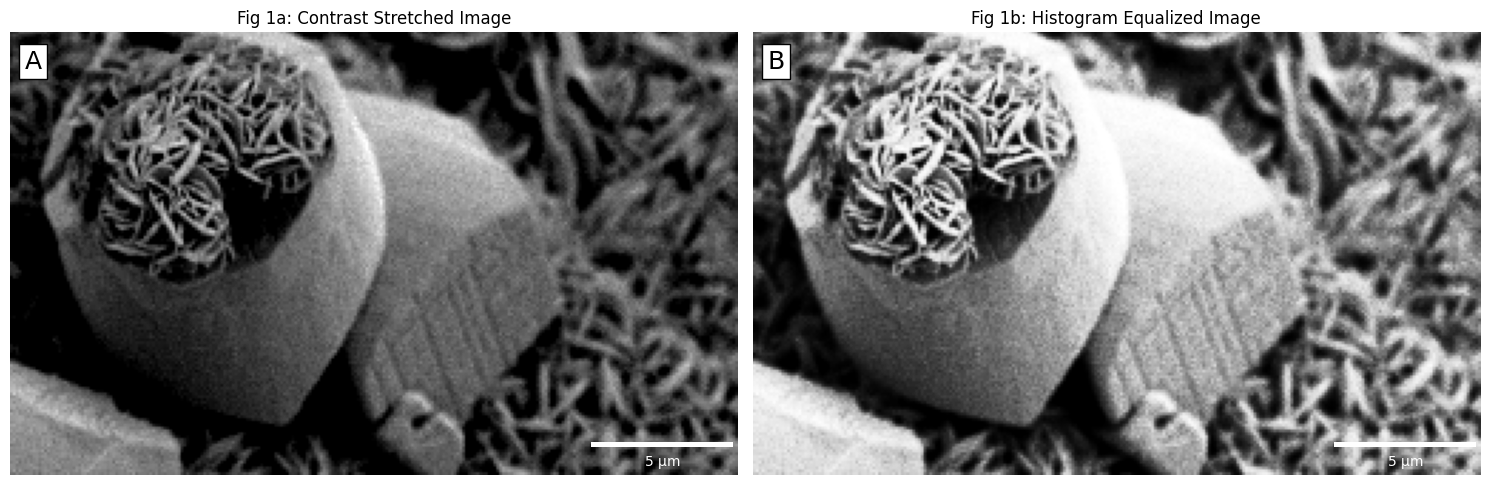

In [67]:
def add_label(ax, label, fontsize=18):
    ax.text(0.02, 0.96, label, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=1, edgecolor='black'))

# Adjust contrast using rescaling
contrast_stretched = exposure.rescale_intensity(cropped_image, in_range=(50, 200))

# Histogram equalization
equalized_image = exposure.equalize_hist(cropped_image)

# Prepare the images for publication with labels, scale bar, and colorbar
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Contrast Stretched Image (Fig 1a)
im1 = ax[0].imshow(contrast_stretched, cmap='gray')
ax[0].set_title('Fig 1a: Contrast Stretched Image')
ax[0].axis('off')

# Add label
add_label(ax[0], 'A')

# Add scale bar
scalebar1 = ScaleBar(0.1, 'um', location='lower right', frameon=False, color='white')  # Adjust scale as per your image's scale
ax[0].add_artist(scalebar1)

# Add colorbar
# cax1 = inset_axes(ax[0], width="5%", height="100%", loc='lower left',
#                   bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=ax[0].transAxes, borderpad=0)
# cbar1 = fig.colorbar(im1, cax=cax1)
# cbar1.set_label('Intensity')

# Histogram Equalized Image (Fig 1b)
im2 = ax[1].imshow(equalized_image, cmap='gray')
ax[1].set_title('Fig 1b: Histogram Equalized Image')
ax[1].axis('off')

# Add label
add_label(ax[1], 'B')

# Add scale bar
scalebar2 = ScaleBar(0.1, 'um', location='lower right', frameon=False, color='white')  # Adjust scale as per your image's scale
ax[1].add_artist(scalebar2)

# Add colorbar
# cax2 = inset_axes(ax[1], width="5%", height="100%", loc='lower left',
#                   bbox_to_anchor=(1.05, 0., 1, 1), bbox_transform=ax[1].transAxes, borderpad=0)
# cbar2 = fig.colorbar(im2, cax=cax2)
# cbar2.set_label('Intensity')

plt.tight_layout()
plt.show()

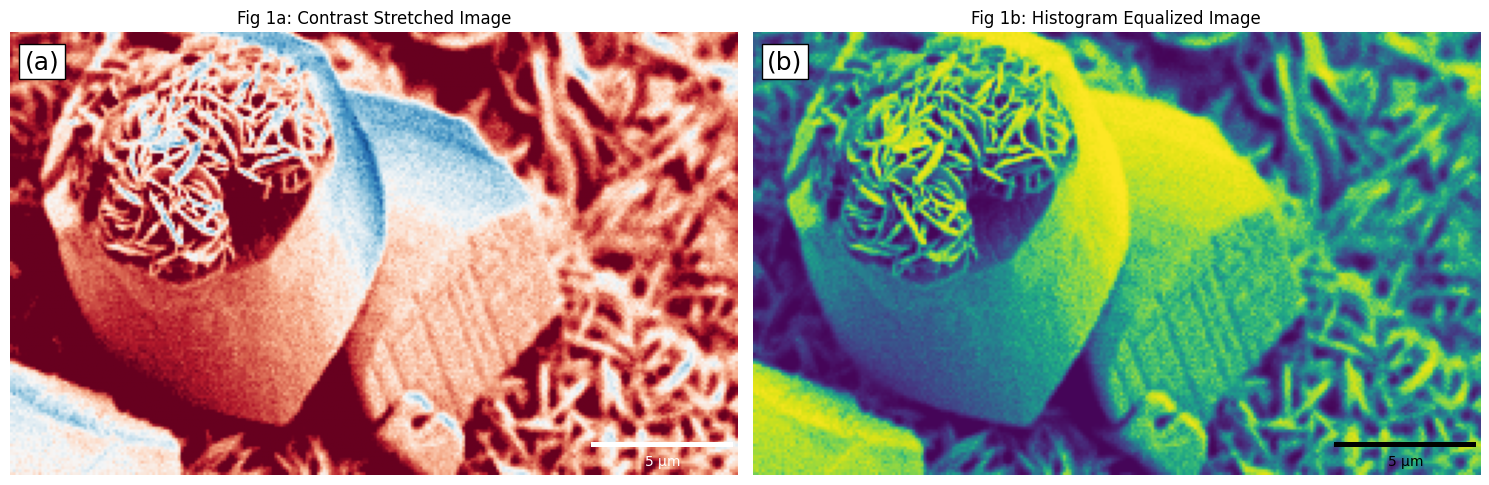

In [87]:
import matplotlib.pyplot as plt
from skimage import exposure
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def add_label(ax, label, fontsize=18):
    ax.text(0.02, 0.96, label, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=1, edgecolor='black'))

# Adjust contrast using rescaling
contrast_stretched = exposure.rescale_intensity(cropped_image, in_range=(50, 200))

# Histogram equalization
equalized_image = exposure.equalize_hist(cropped_image)

# Apply a colormap to the images
contrast_stretched_colored = plt.cm.RdBu(contrast_stretched)
equalized_image_colored = plt.cm.viridis(equalized_image)

# Prepare the images for publication with labels, scale bar, and colorbar
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Contrast Stretched Image (Fig 1a)
im1 = ax[0].imshow(contrast_stretched_colored)
ax[0].set_title('Fig 1a: Contrast Stretched Image')
ax[0].axis('off')

# Add label
add_label(ax[0], '(a)')

# Add scale bar
scalebar1 = ScaleBar(0.1, 'um', location='lower right', frameon=False, color='white', )  # Adjust scale as per your image's scale
ax[0].add_artist(scalebar1)

# Histogram Equalized Image (Fig 1b)
im2 = ax[1].imshow(equalized_image_colored)
ax[1].set_title('Fig 1b: Histogram Equalized Image')
ax[1].axis('off')

# Add label
add_label(ax[1], '(b)')

# Add scale bar
scalebar2 = ScaleBar(0.1, 'um', location='lower right', frameon=False, color='black')  # Adjust scale as per your image's scale
ax[1].add_artist(scalebar2)

plt.tight_layout()

# Save the figure
plt.savefig('publication_ready_image.png', dpi=300, bbox_inches='tight')

plt.show()


### Summary
In this notebook, we have covered the basic steps to process electron microscopy images, including:
- Loading and visualizing images.
- Cropping images to focus on regions of interest.
- Applying filters to enhance image quality.
- Preparing images for publication by adjusting contrast.

### Further Exploration
- Experiment with different filters and contrast adjustments.
- Try combining filters to enhance specific features in the images.
- Incorporate additional preprocessing steps like noise reduction and image stitching.
